In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from tensorflow import keras
import math
from sklearn import preprocessing
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from collections import Counter

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
import pandas as pd
import numpy as np
import random
import os
import json
import gzip
import pandas as pd
from urllib.request import urlopen
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import itertools
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import ComplementNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.svm import LinearSVC 
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import classification_report
import pickle
import re

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd '/content/drive/My Drive/Weather IoT'
!ls

/content/drive/My Drive/Weather IoT
'Cat Bi.csv'		    'Noi Bai.csv'	 Vinh.csv
'Classifier Weather.ipynb'  'Phu Bai.csv'	'weather classifier.pkl'
'Da Nang.csv'		    'Tan Son Nhat.csv'	'weather data crawler.ipynb'
 model_checkpoint.h5	    'turn in.zip'	'weather encoder.pkl'


In [ ]:
df = pd.read_csv("Noi Bai.csv")
columns =['Temperature', 'Humidity', 'UV index', 'Wind direction', 'Wind speed', 'Pressure']
for col in columns[:-1]:
  for i, x in enumerate(df[col]):
    df[col][i] = np.nan if x == 'None' else int(x)

for i, x in enumerate(df['Pressure']):
  df['Pressure'][i] = np.nan if x == 'None' else float(x)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
columns

['Temperature',
 'Humidity',
 'UV index',
 'Wind direction',
 'Wind speed',
 'Pressure']

In [ ]:
def mean(a):
  return sum(a)/len(a)

def fill_none(array_col):
  for i in range(len(array_col)):
    if math.isnan(array_col[i]):
      try:
        tl = [tmp for tmp in array_col[i-4:i+4] if math.isnan(tmp) == False]
        array_col[i] = mean(tl)
      except:
        array_col[i] = 270
  return array_col

for col in columns:
  df[col]= fill_none(df[col].values)


df['Conclusion'] = df['Conclusion'].replace(['Light Drizzle','Drizzle', 'Rain Shower', 'Light Rain / Windy', 'Light Rain with Thunder', 'Light Rain Shower', 'Heavy Rain','Heavy Rain / Windy', 'Rain / Windy', 'Heavy Rain Shower', 'Heavy Drizzle', 'Light Rain'],'Rain')
df['Conclusion'] = df['Conclusion'].replace(['Thunder in the Vicinity', 'Thunder / Windy', 'Thunder and Hail'],'Thunder')
df['Conclusion'] = df['Conclusion'].replace(['Fair / Windy'],'Fair')
df['Conclusion'] = df['Conclusion'].replace(['Patches of Fog', 'Drizzle and Fog'],'Fog')
df['Conclusion'] = df['Conclusion'].replace(['Cloudy / Windy', 'Mostly Cloudy / Windy', 'Partly Cloudy / Windy', 'Mostly Cloudy', 'Partly Cloudy'],'Cloudy')
df['Conclusion'] = df['Conclusion'].replace(['Heavy T-Storm / Windy', 'Heavy T-Storm', 'T-Storm / Windy'],'T-Storm')

df.head()

,Temperature,Humidity,Pressure,UV index,Conclusion,Wind direction,Wind speed
0,59,88,30.16,0,Fog,270,3
1,59,88,30.19,0,Fog,270,1
2,57,94,30.16,0,Fog,270,3
3,57,88,30.16,0,Fog,270,1
4,55,94,30.16,0,Fog,90,3


In [ ]:
df['Conclusion'].value_counts()

Cloudy     15036
Rain        1483
Fair        1000
Thunder      714
Fog           43
Name: Conclusion, dtype: int64

In [ ]:
df.to_csv(r'/content/drive/MyDrive/Weather IoT/Noi Bai fillna.csv', index=False, encoding="utf-8-sig")

In [ ]:
label_encoder = preprocessing.LabelEncoder()

conclusion_arr = df['Conclusion'].values
label_encoder.fit(conclusion_arr)
numerical_label = label_encoder.transform(conclusion_arr)

df = df.drop(columns=['Conclusion'])
df.columns = ['Temperature', 'Humidity', 'Pressure', 'UV index', 'Wind direction', 'Wind speed']
df['Label'] = numerical_label
a = df['Label'].value_counts().index.tolist()
b = df['Label'].value_counts().tolist()
occur = {}
for i in range(len(a)):
  occur[a[i]] = b[i]

label_under_400 = []
for k, v in occur.items():
  if v < 400:
    label_under_400.append(k)

for i in label_under_400:
  df = df.drop(df[df['Label'] == i].index)

y = df['Label'].values
label_encoder_2 = preprocessing.LabelEncoder()

label_encoder_2.fit(y)
y = label_encoder_2.transform(y)

df = df.drop(columns=['Label'])
X = df.values

rus = RandomUnderSampler(random_state=0)
X_train, y_train = rus.fit_resample(X, y)

# X_train, y_train = X, y

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
X_train[200]

array([70, 64, 30.01, 0, 70, 13], dtype=object)

In [ ]:
num_folds = 10
scoring = 'accuracy'
seed = 42 

In [ ]:
X_train.shape

(4228, 6)

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from lightgbm import LGBMClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
import seaborn as sns

cnames = ["Random Forest",
         "Naive Bayes Guassian", "LightGBM"
        ]

classifiers = [
    RandomForestClassifier(),
    GaussianNB(),
    LGBMClassifier()
]

results = []
confusion_matrices = []

for name, model in zip(cnames, classifiers):
  kfold = KFold(n_splits=num_folds,random_state=seed,shuffle=True)
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
  y_pred = cross_val_predict(model, X_train, y_train, cv=kfold)
  cf_matrix = confusion_matrix(y_train, y_pred)
  results.append(cv_results)
  confusion_matrices.append(cf_matrix)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

Random Forest: 0.532873 (0.023534)
Naive Bayes Guassian: 0.471389 (0.018714)
LightGBM: 0.539262 (0.023454)


In [ ]:
model = RandomForestClassifier()
model.fit(X_train, y_train)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    ---------
    cf:            confusion matrix to be passed in
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    normalize:     If True, show the proportions for each category. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks:       If True, show x and y ticks. Default is True.
    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
    sum_stats:     If True, display summary statistics below the figure. Default is True.
    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
    title:         Title for the heatmap. Default is None.
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=True,fmt='g',cmap='Blues',cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

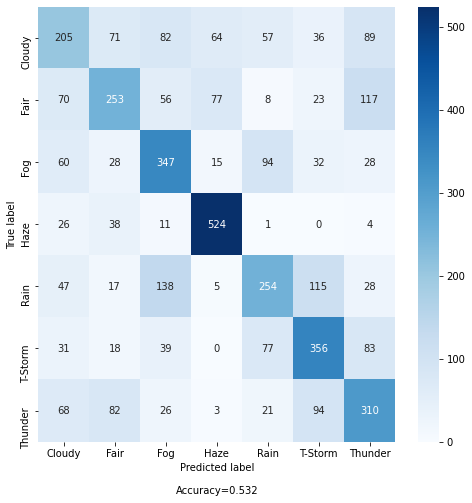

In [ ]:
labels = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
categories = label_encoder.inverse_transform(label_encoder_2.classes_)


make_confusion_matrix(confusion_matrices[2], 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues', figsize=(8, 8))

# sns.heatmap(confusion_matrices[2], annot=True, cmap='Blues', fmt='g')

In [ ]:
from lightgbm import LGBMClassifier
import pickle

classifier = LGBMClassifier()
classifier.fit(X_train, y_train)

filename = '/content/drive/MyDrive/Weather IoT/weather classifier.pkl'
encoder = '/content/drive/MyDrive/Weather IoT/weather encoder.pkl'
pickle.dump(classifier, open(filename, 'wb'))
pickle.dump(label_encoder, open(encoder, 'wb'))

In [ ]:
  encoder = '/content/drive/MyDrive/Weather IoT/weather encoder.pkl'
pickle.dump(label_encoder, open(encoder, 'wb'))